Hypothesis: We believe there's a correlation between temperature and the incidence of crime in Silver Spring, Maryland


In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import datetime

In [2]:
# Save file path to variable
crimeMD_path = "Crime_MD.csv"
# silverspring_path = "silver_spring_climate.csv"

# Read with Pandas
crime_df = pd.read_csv(crimeMD_path, low_memory=False)
# silverspring_temp_df = pd.read_csv(silverspring_path)


In [3]:
# Pulling out only the columns of interest
main_crime_df = crime_df[['Crime Name1', 'Crime Name2', 'Crime Name3', 'City', 'Start_Date_Time']]

In [4]:
# Remove crimeless data and changing columns name 
main_crime_df = main_crime_df.loc[main_crime_df['Crime Name1'] != 'Not a Crime']
clean_crime_df = main_crime_df.rename(columns={'Crime Name1': 'Crime Main Category',
                                             'Crime Name2': 'Crime Sub Category',
                                             'Start_Date_Time': 'Date & Time of Crime'})

clean_crime_df['Date & Time of Crime']= pd.to_datetime(clean_crime_df['Date & Time of Crime'])
clean_crime_df['City'].value_counts()
silverspring_crime_df = clean_crime_df.loc[clean_crime_df['City'] == 'SILVER SPRING']
silverspring_crime_df

,Crime Main Category,Crime Sub Category,Crime Name3,City,Date & Time of Crime
0,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,SILVER SPRING,2019-01-16 15:51:00
2,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,SILVER SPRING,2019-11-28 06:08:00
8,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,SILVER SPRING,2017-07-01 00:00:00
11,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - SELL,SILVER SPRING,2019-01-07 20:00:00
20,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,SILVER SPRING,2019-09-17 15:30:00
...,...,...,...,...,...
212977,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - FORCED ENTRY-RESIDENTIAL,SILVER SPRING,2019-07-25 22:54:00
212981,Crime Against Property,All other Larceny,LARCENY (DESCRIBE OFFENSE),SILVER SPRING,2019-06-27 22:00:00
212983,Crime Against Property,Bad Checks,FRAUD - INSUFFICIENT FUNDS CHECK,SILVER SPRING,2019-06-21 16:30:00
212990,Other,All Other Offenses,POLICE INFORMATION,SILVER SPRING,2019-07-10 13:10:00


In [5]:
# Figure out the timeline of interest
data_first_date = silverspring_crime_df['Date & Time of Crime'].min()
data_last_date = silverspring_crime_df['Date & Time of Crime'].max()

print(data_first_date)
print(data_last_date)

# Throw away 2016 and 2020 
silverspring_clean_df = silverspring_crime_df.loc[(silverspring_crime_df['Date & Time of Crime'] > '2016-12-31 23:59:59') & (silverspring_crime_df['Date & Time of Crime'] < '2020-01-01 00:00:00')]

2016-07-01 00:00:00
2020-07-17 17:00:00


In [ ]:
silverspring_clean_df

In [6]:
# Extract year from string format date
silverspring_clean_df['Year'] = pd.DatetimeIndex(silverspring_clean_df['Date & Time of Crime']).year
silverspring_clean_df['Month'] = pd.DatetimeIndex(silverspring_clean_df['Date & Time of Crime']).month

silverspring_clean_df.head(3)

C:\Users\ckuna\Anaconda3\envs\NewPythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ckuna\Anaconda3\envs\NewPythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Crime Main Category,Crime Sub Category,Crime Name3,City,Date & Time of Crime,Year,Month
0,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,SILVER SPRING,2019-01-16 15:51:00,2019,1
2,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,SILVER SPRING,2019-11-28 06:08:00,2019,11
8,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,SILVER SPRING,2017-07-01 00:00:00,2017,7


In [ ]:
# Dan's code starts here - Property/Other

In [ ]:
# Dan's code ends here

In [ ]:
# Cynthia's code starts here - Person

Sub-Hypothesis: We believe that as temperature decreases to a certain point during the winter, the crime against person will also decreases. This is because people are less likely to come out during the winter time when it gets too cold, making crime occur less.


In [7]:
# Create Crime Against Person df
person_crime_df = silverspring_clean_df.loc[(silverspring_clean_df['Crime Main Category'] == 'Crime Against Person'), :]
person_crime_df

,Crime Main Category,Crime Sub Category,Crime Name3,City,Date & Time of Crime,Year,Month
2,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,SILVER SPRING,2019-11-28 06:08:00,2019,11
50,Crime Against Person,Aggravated Assault,ASSAULT - AGGRAVATED - OTHER,SILVER SPRING,2019-10-08 21:08:00,2019,10
131,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,SILVER SPRING,2018-10-01 00:00:00,2018,10
241,Crime Against Person,Fondling,SEX ASSAULT - FONDLING,SILVER SPRING,2019-08-18 12:00:00,2019,8
321,Crime Against Person,Simple Assault,ASSAULT - SIMPLE,SILVER SPRING,2019-10-15 00:25:00,2019,10
...,...,...,...,...,...,...,...
212889,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,SILVER SPRING,2019-06-30 10:41:00,2019,6
212935,Crime Against Person,Aggravated Assault,ASSAULT - AGGRAVATED - FAMILY-OTHER WEAPON,SILVER SPRING,2019-06-29 22:10:00,2019,6
212946,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,SILVER SPRING,2019-05-24 11:00:00,2019,5
212950,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,SILVER SPRING,2019-07-24 17:28:00,2019,7


In [38]:
# Using Groupby
personmonthgroup = person_crime_df.groupby('Month')
personcrime_count_month = personmonthgroup['Month'].count()
personcrime_count_month

personcrime_df = pd.DataFrame({'Number of Crime Incidence':personcrime_count_month})
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


personcrime_index_df = personcrime_df.reset_index(drop=True)
personcrime_index_df['Month'] = months
personcrime_index_df = personcrime_index_df[['Month','Number of Crime Incidence']]
personcrime_index_df

,Month,Number of Crime Incidence
0,January,384
1,February,362
2,March,434
3,April,404
4,May,439
5,June,442
6,July,405
7,August,404
8,September,471
9,October,416


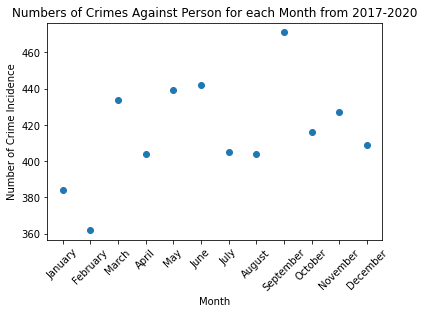

In [53]:
# Visualize the incidence of Crime Against Person for each month from 2017-2020
x_all = personcrime_index_df['Month']
y_all = personcrime_index_df['Number of Crime Incidence']

plt.scatter(x_all, y_all,)
plt.xticks(rotation=45)

plt.xlabel('Month')
plt.ylabel('Number of Crime Incidence')
plt.title('Numbers of Crimes Against Person for each Month from 2017-2020')

plt.show()

In [8]:
# Create different df for different year (2017-2019)
person_crime_2017df = person_crime_df.loc[person_crime_df['Year'] == 2017]
person_crime_2018df = person_crime_df.loc[person_crime_df['Year'] == 2018]
person_crime_2019df = person_crime_df.loc[person_crime_df['Year'] == 2019]

In [ ]:
# Number of crime in each month for 2017
monthgroup = person_crime_2017df.groupby('Month')
personcrime_count_month = personmonthgroup['Month'].count()
personcrime_count_month

personcrime_df = pd.DataFrame({'Number of Crime Incidence':personcrime_count_month})

personcrime_index_df = personcrime_df.reset_index(drop=True)
personcrime_index_df['Month'] = months
personcrime_index_df = personcrime_index_df[['Month','Number of Crime Incidence']]
personcrime_index_df

In [ ]:
# Number of crime in each month for 2017
crimect_2017 = person_crime_2017df['Month'].value_counts()
crimect2017plot = crimect_2017.plot(kind='bar', title='Numbers of Crimes Against Person for each Month in 2017')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')

In [ ]:
# # Look at sub category of crime -- ain't going there -_-
# person_crime_stat = person_crime_df.groupby('Crime Sub Category')['Crime Sub Category'].count()
# person_crime_stat

In [ ]:
# person_crime_stat.plot(kind='bar', title='Count of Different Types of Crime Against Person')
# plt.xlabel('Types of Crime Against Person')
# plt.ylabel("Number of Cases")

# plt.xlim(-0.75, len(person_crime_stat))
# plt.ylim(0, max(person_crime_stat)+100)

# plt.show()

In [ ]:
# Cynthia's code ends here

In [ ]:
# Rose's code starts here - Society

In [ ]:
# Rose's code ends here

In [ ]:
# Paul's code starts here - API!!!

In [ ]:
# Paul's code ends here